##  Load TensorFlow Libary and Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

## Load dataset from Keras dataset

In [2]:
 fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

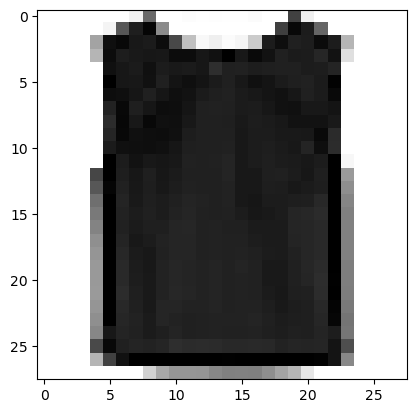

In [5]:
 plt.imshow(X_train[55], cmap="binary")
plt.show()

In [6]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
 class_names[y_train[55]]

'Shirt'

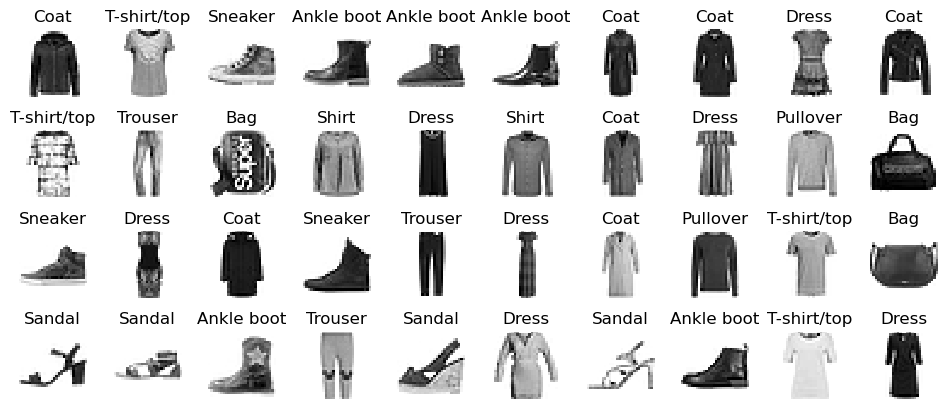

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###  Design and build Neural Network to classify the MINST

In [10]:
 model = keras.models.Sequential()
model.add(keras.layers.Input(shape=[28, 28], name="input_layer"))
model.add(keras.layers.Flatten(name="1st_layer_flatten"))
model.add(keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"))
model.add(keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_layer"))

In [11]:
 # Another way to build the Sequential model
model = keras.models.Sequential([
                                keras.layers.Input(shape=[28, 28], name="input_layer"),
                                keras.layers.Flatten(name="1st_layer_flatten"),
                                keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"),
                                keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"),
                                keras.layers.Dense(10, activation="softmax", name="Output_layer"),
])

###  Check the model object

In [12]:
model.layers

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer_flatten (Flatten  (None, 784)               0         
 )                                                               
                                                                 
 2nd_hidden_layer (Dense)    (None, 200)               157000    
                                                                 
 3nd_hidden_layer (Dense)    (None, 100)               20100     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


###  Complie the model

In [15]:
 model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

 ### Train the model

In [16]:
 history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7377 - accuracy: 0.7512 - val_loss: 0.5088 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4972 - accuracy: 0.8263 - val_loss: 0.4656 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4507 - accuracy: 0.8425 - val_loss: 0.4151 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4227 - accuracy: 0.8519 - val_loss: 0.3978 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4023 - accuracy: 0.8585 - val_loss: 0.4258 - val_accuracy: 0.8498
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3873 - accuracy: 0.8643 - val_loss: 0.3941 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3739 - accuracy: 0.8680 - val_loss: 0.3671 - val_accuracy:

### Plot the learning curve

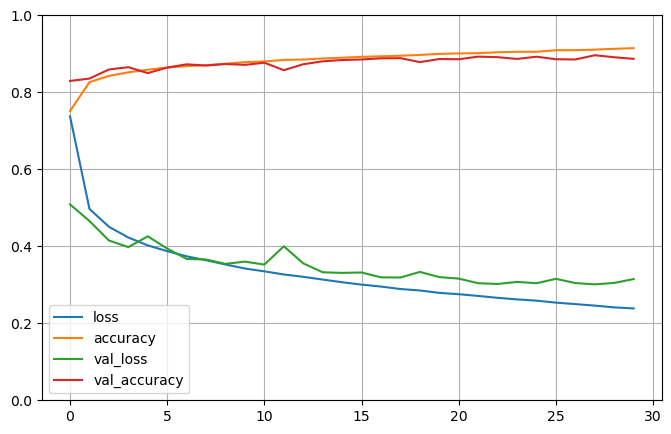

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.8704


[0.3524170517921448, 0.8704000115394592]

In [19]:
 y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.99763599e-05, 5.73140369e-07, 7.72461772e-06, ...,
        1.93608738e-02, 2.04839409e-04, 9.70729887e-01],
       [9.30279566e-06, 1.47352681e-08, 9.99435484e-01, ...,
        5.70016846e-11, 1.46335509e-07, 5.70864397e-11],
       [2.91738911e-06, 9.99996185e-01, 1.34372309e-08, ...,
        4.57237616e-11, 1.22994503e-09, 5.62761678e-11],
       ...,
       [2.39203684e-03, 1.05537318e-07, 8.59072839e-04, ...,
        2.47302773e-06, 9.95495677e-01, 1.94585468e-07],
       [5.42976159e-06, 9.99910235e-01, 1.26143141e-06, ...,
        1.86066007e-08, 5.57478472e-08, 5.37964354e-07],
       [1.24159924e-05, 1.03638149e-05, 1.00657584e-04, ...,
        2.01809569e-03, 7.86672463e-04, 1.40252632e-05]], dtype=float32)

In [20]:
y_pred.shape, y_test.shape

((10000, 10), (10000,))

In [21]:
 acc = tf.keras.metrics.sparse_categorical_accuracy(y_test, y_pred)

In [22]:
acc.numpy().sum() / acc.numpy().shape[0]

0.8704